In [1]:
import game as gm
import multiprocess as mp
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['text.usetex'] = True

In [2]:
def split_list(li: list, n: int):
    len_subli = int(len(li) / n)
    sublis = []
    for i in range(n - 1):
        start = len_subli * i
        sublis.append(li[start: start + len_subli])
    sublis.append(li[len_subli * (n-1):])
    return sublis

def job(model, theta_1_subarr, theta_2_arr, d_1_mat, d_2_mat):
    for theta_1 in theta_1_subarr:
        d_1_theta_1 = []
        d_2_theta_1 = []
        for theta_2 in theta_2_arr:
            d_1, d_2 = model.equillirbium(theta_1, theta_2)
            d_1_theta_1.append(d_1)
            d_2_theta_1.append(d_2)
        d_1_mat.append(d_1_theta_1)
        d_2_mat.append(d_2_theta_1)

def simulate_equilibrums(model, theta_1_arr, theta_2_arr):
    manager_theta_1 = mp.Manager()
    ngroups_theta_1 = 8
    theta_1_subarrs = split_list(theta_1_arr, ngroups_theta_1)
    processes = []
    d_1_mat_jobs, d_2_mat_jobs = [], []
    d_1_mat, d_2_mat = [], []

    for theta_1_subarr in theta_1_subarrs:
        d_1_mat_job_i = manager_theta_1.list()
        d_2_mat_job_i = manager_theta_1.list()
        processes.append(mp.Process(
            target=job,
            args=(model, theta_1_subarr, theta_2_arr, d_1_mat_job_i, d_2_mat_job_i)
        ))
        d_1_mat_jobs.append(d_1_mat_job_i)
        d_2_mat_jobs.append(d_2_mat_job_i)
    for i in range(ngroups_theta_1):
        processes[i].start()
    for i in range(ngroups_theta_1):
        processes[i].join()
    for i in range(ngroups_theta_1):
        d_1_mat += d_1_mat_jobs[i]
        d_2_mat += d_2_mat_jobs[i]
    d_1_mat = np.array(d_1_mat)
    d_2_mat = np.array(d_2_mat)
    Theta_2_Mat, Theta_1_Mat = np.meshgrid(theta_1_arr, theta_2_arr)
    return Theta_2_Mat, Theta_1_Mat, d_1_mat, d_2_mat

In [3]:
theta_1_arr = np.linspace(0, 1, 101)
theta_2_arr = np.linspace(0, 1, 101)

## $r = 0.5$

Create model

In [4]:
r = 0.5
alpha = 0.5
my_model_1 = gm.Game(n=5, alpha=alpha, r=r, M1=1, M2=1, sigma1=1, sigma2=1)

Theta_2_Mat, Theta_1_Mat, d_1_mat_r_0_5, d_2_mat_r_0_5 = \
    simulate_equilibrums(my_model_1, theta_1_arr, theta_2_arr)

D_1_mat_r_0_5 = (alpha * d_1_mat_r_0_5 ** r + alpha * (theta_2_arr[None, :] * d_2_mat_r_0_5) ** r) ** (1/r)
D_2_mat_r_0_5 = (alpha * (theta_1_arr[:, None] * d_1_mat_r_0_5) ** r + alpha * d_2_mat_r_0_5 ** r) ** (1/r)

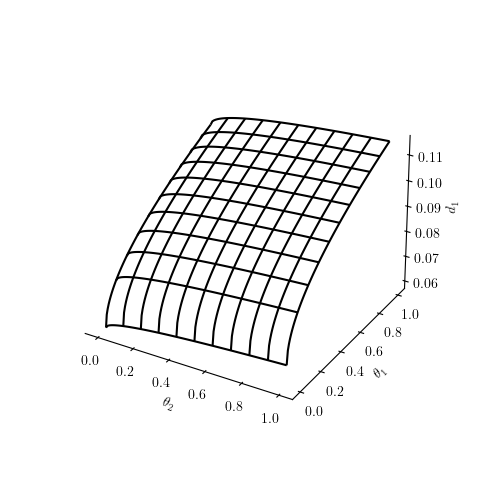

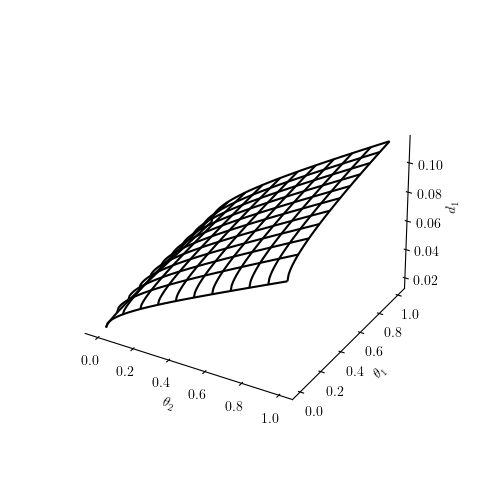

In [5]:
# d_1 plot
ax = plt.figure(figsize=(6,6)).add_subplot(projection='3d')
ax.plot_wireframe(Theta_2_Mat, Theta_1_Mat, d_1_mat_r_0_5, rstride=10, cstride=10, color='black')
# background color
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# Set label
ax.set_box_aspect(aspect=None, zoom=0.8)
ax.set(xlabel=r'$\theta_2$', ylabel=r'$\theta_1$', zlabel=r"$d_1$")
plt.show()

# D_1 plot
ax = plt.figure(figsize=(6,6)).add_subplot(projection='3d')
ax.plot_wireframe(Theta_2_Mat, Theta_1_Mat, D_1_mat_r_0_5, rstride=10, cstride=10, color='black')
# background color
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# Set label
ax.set_box_aspect(aspect=None, zoom=0.8)
ax.set(xlabel=r'$\theta_2$', ylabel=r'$\theta_1$', zlabel=r"$d_1$")
plt.show()

## $r>1.0, M_1 = M_2 = 1$

In [6]:
r = 1.5
my_model_2 = gm.Game(n=5, alpha=0.5, r=r, M1=1, M2=1, sigma1=1, sigma2=1)

_, _, d_1_mat_r_1_5, d_2_mat_r_1_5 = \
    simulate_equilibrums(my_model_2, theta_1_arr, theta_2_arr)

D_1_mat_r_1_5 = (alpha * d_1_mat_r_1_5 ** r + (1 - alpha) * (theta_2_arr[None, :] * d_2_mat_r_1_5) ** r) ** (1/r)
D_2_mat_r_1_5 = (alpha * d_2_mat_r_1_5 ** r + (1 - alpha) * (theta_1_arr[:, None] * d_1_mat_r_1_5) ** r) ** (1/r)

In [7]:
r = 1.9
my_model_3 = gm.Game(n=5, alpha=alpha, r=r, M1=1, M2=1, sigma1=1, sigma2=1)

Theta_2_Mat, Theta_1_Mat, d_1_mat, d_2_mat = \
    simulate_equilibrums(my_model_3, theta_1_arr, theta_2_arr)

D_1_mat_r_1_9 = (alpha * d_1_mat ** r + (1 - alpha) * (theta_2_arr[None, :] * d_2_mat) ** r) ** (1/r)
D_2_mat_r_1_9 = (alpha * d_2_mat ** r + (1 - alpha) * (theta_1_arr[:, None] * d_1_mat) ** r) ** (1/r)

/Users/zhuanglinsheng/Library/CloudStorage/Dropbox/Researches/Data-Sharing-Project/Paper/Version-10/_numerical/game.py:11: RuntimeWarning: invalid value encountered in scalar power
  mixing = alpha * d ** r + (1 - alpha) * np.power(d_F, r).sum()
/Users/zhuanglinsheng/Library/CloudStorage/Dropbox/Researches/Data-Sharing-Project/Paper/Version-10/_numerical/game.py:11: RuntimeWarning: invalid value encountered in power
  mixing = alpha * d ** r + (1 - alpha) * np.power(d_F, r).sum()
/Users/zhuanglinsheng/Library/CloudStorage/Dropbox/Researches/Data-Sharing-Project/Paper/Version-10/_numerical/game.py:11: RuntimeWarning: invalid value encountered in power
  mixing = alpha * d ** r + (1 - alpha) * np.power(d_F, r).sum()
/Users/zhuanglinsheng/Library/CloudStorage/Dropbox/Researches/Data-Sharing-Project/Paper/Version-10/_numerical/game.py:11: RuntimeWarning: invalid value encountered in scalar power
  mixing = alpha * d ** r + (1 - alpha) * np.power(d_F, r).sum()
/Users/zhuanglinsheng/Library/

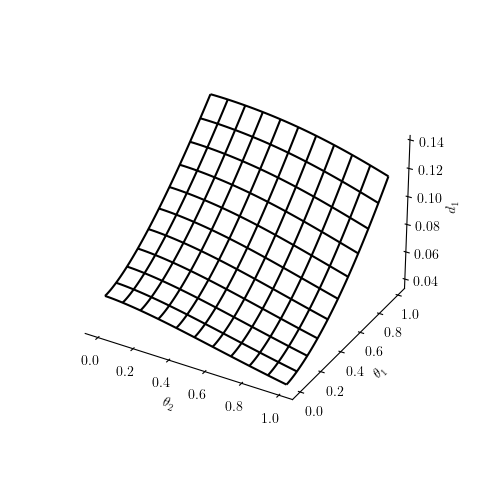

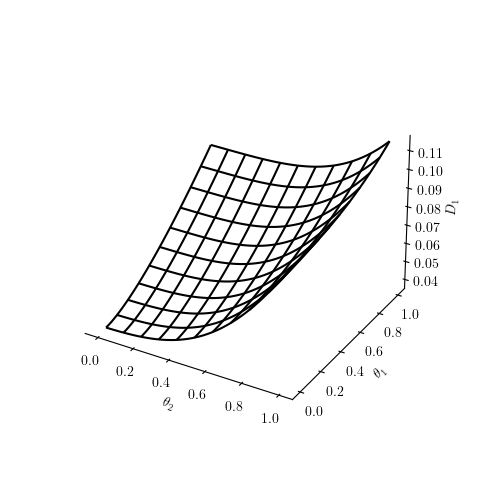

In [8]:
# d_1 plot
ax = plt.figure(figsize=(6,6)).add_subplot(projection='3d')
ax.plot_wireframe(Theta_2_Mat, Theta_1_Mat, d_1_mat_r_1_5, rstride=10, cstride=10, color='black')
# background color
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# Set label
ax.set_box_aspect(aspect=None, zoom=0.8)
ax.set(xlabel=r'$\theta_2$', ylabel=r'$\theta_1$', zlabel=r"$d_1$")
plt.show()

# D_1 plot
ax = plt.figure(figsize=(6,6)).add_subplot(projection='3d')
ax.plot_wireframe(Theta_2_Mat, Theta_1_Mat, D_1_mat_r_1_5, rstride=10, cstride=10, color='black')
# background color
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
# Set label
ax.set_box_aspect(aspect=None, zoom=0.8)
ax.set(xlabel=r'$\theta_2$', ylabel=r'$\theta_1$', zlabel=r"$D_1$")
plt.show()

## Figures to Display

$d_1$ and $d_2$ with respect to $\theta_1$ under different $r$

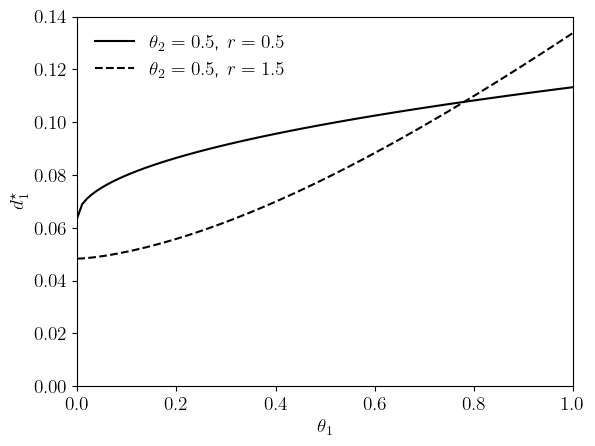

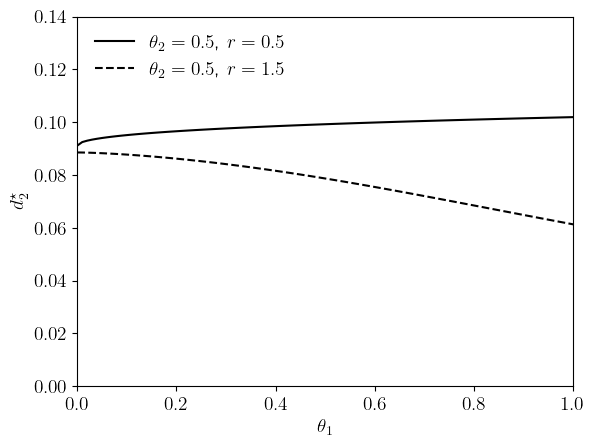

In [9]:
plt.rcParams.update({'font.size': 14})

# d_1 w.r.t. theta_1
plt.plot(theta_1_arr, d_1_mat_r_0_5[:,50], label=r'$\theta_2 = 0.5$, $r = 0.5$', color='black', linestyle='solid')
plt.plot(theta_1_arr, d_1_mat_r_1_5[:,50], label=r'$\theta_2 = 0.5$, $r = 1.5$', color='black', linestyle='dashed')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$d_1^\star$')
plt.xlim((0,1))
plt.ylim((0,0.14))
plt.legend(frameon=False)
plt.savefig('../_numerical_output/fig_d1_theta1_ces.pdf', bbox_inches='tight')
plt.show()

# d_2 w.r.t. theta_1
plt.plot(theta_1_arr, d_2_mat_r_0_5[:,50], label=r'$\theta_2 = 0.5$, $r = 0.5$', color='black', linestyle='solid')
plt.plot(theta_1_arr, d_2_mat_r_1_5[:,50], label=r'$\theta_2 = 0.5$, $r = 1.5$', color='black', linestyle='dashed')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$d_2^\star$')
plt.xlim((0,1))
plt.ylim((0,0.14))
plt.legend(frameon=False, loc='upper left')
plt.savefig('../_numerical_output/fig_d2_theta1_ces.pdf', bbox_inches='tight')
plt.show()

$D_1$ and $D_2$ with respect to $\theta_1$ under different $r$

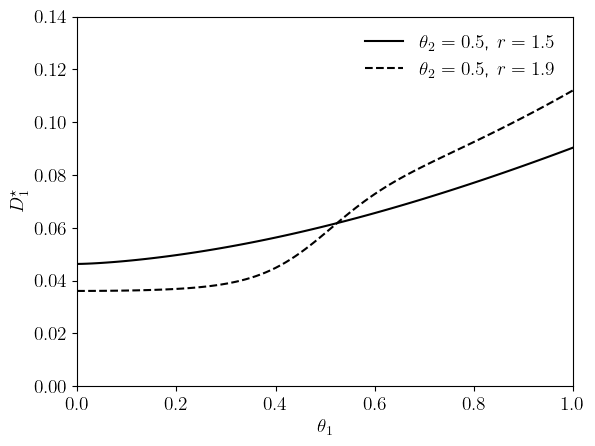

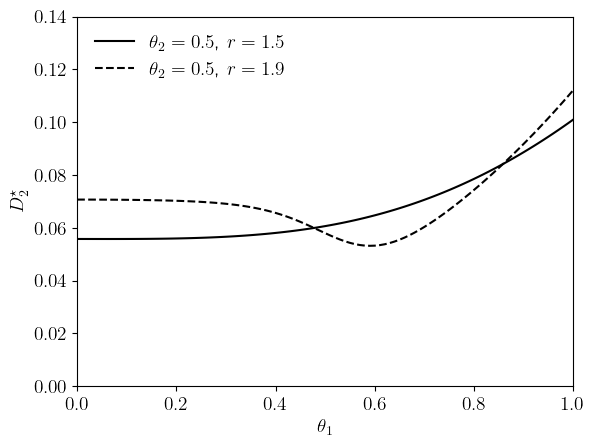

In [10]:
plt.rcParams.update({'font.size': 14})

# D_1 w.r.t. theta_1
# plt.plot(theta_1_arr, D_1_mat_r_0_5[:,50], label=r'$\theta_2 = 0.5$, $r = 0.5$', color='black', linestyle='solid')
plt.plot(theta_1_arr, D_1_mat_r_1_5[:,50], label=r'$\theta_2 = 0.5$, $r = 1.5$', color='black', linestyle='solid')
plt.plot(theta_1_arr, D_1_mat_r_1_9[:,50], label=r'$\theta_2 = 0.5$, $r = 1.9$', color='black', linestyle='dashed')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$D_1^\star$')
plt.xlim((0,1))
plt.ylim((0,0.14))
plt.legend(frameon=False)
plt.savefig('../_numerical_output/fig_BigD1_theta1_ces.pdf', bbox_inches='tight')
plt.show()

# D_2 w.r.t. theta_1
plt.plot(theta_1_arr, D_2_mat_r_1_5[:,50], label=r'$\theta_2 = 0.5$, $r = 1.5$', color='black', linestyle='solid')
plt.plot(theta_1_arr, D_2_mat_r_1_9[:,50], label=r'$\theta_2 = 0.5$, $r = 1.9$', color='black', linestyle='dashed')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$D_2^\star$')
plt.xlim((0,1))
plt.ylim((0,0.14))
plt.legend(frameon=False, loc='upper left')
plt.savefig('../_numerical_output/fig_BigD2_theta1_ces.pdf', bbox_inches='tight')
plt.show()